# Using the QLattice with small data sets

In many cases, a researcher has collected a fairly small dataset of a few hundred individuals. In this notebook we apply a systematic approach to test the performance of the QLattice against the usual go-to technologies for fitting and ML.

We compare to other **interpretable** models:
- Linear models (both with and without LASSO)
- Decision Trees

And to other **ensemble models** which are more black-box:
- Random Forest
- Gradient Boosting

In [1]:
import pmlb
import pandas as pd
import feyn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time


In [2]:
print(len(pmlb.classification_dataset_names)+len(pmlb.regression_dataset_names))

284


In [3]:
#for name in pmlb.regression_dataset_names:
#    df = pmlb.fetch_data(name, local_cache_dir="/tmp/pmlb_data")
#    print(f"('{name}', {len(df)}, {len(df.columns)}),")   

In [4]:
datasets = pd.DataFrame([
('1027_ESL', 488, 5),
('1028_SWD', 1000, 11),
('1029_LEV', 1000, 5),
('1030_ERA', 1000, 5),
('1089_USCrime', 47, 14),
('1096_FacultySalaries', 50, 5),
('1191_BNG_pbc', 1000000, 19),
('1193_BNG_lowbwt', 31104, 10),
('1196_BNG_pharynx', 1000000, 11),
('1199_BNG_echoMonths', 17496, 10),
('1201_BNG_breastTumor', 116640, 10),
('1203_BNG_pwLinear', 177147, 11),
('1595_poker', 1025010, 11),
('192_vineyard', 52, 3),
('195_auto_price', 159, 16),
('197_cpu_act', 8192, 22),
('201_pol', 15000, 49),
('207_autoPrice', 159, 16),
('210_cloud', 108, 6),
('215_2dplanes', 40768, 11),
('218_house_8L', 22784, 9),
('225_puma8NH', 8192, 9),
('227_cpu_small', 8192, 13),
('228_elusage', 55, 3),
('229_pwLinear', 200, 11),
('230_machine_cpu', 209, 7),
('294_satellite_image', 6435, 37),
('344_mv', 40768, 11),
('4544_GeographicalOriginalofMusic', 1059, 118),
('485_analcatdata_vehicle', 48, 5),
('503_wind', 6574, 15),
('505_tecator', 240, 125),
('519_vinnie', 380, 3),
('522_pm10', 500, 8),
('523_analcatdata_neavote', 100, 3),
('527_analcatdata_election2000', 67, 15),
('529_pollen', 3848, 5),
('537_houses', 20640, 9),
('542_pollution', 60, 16),
('547_no2', 500, 8),
('556_analcatdata_apnea2', 475, 4),
('557_analcatdata_apnea1', 475, 4),
('560_bodyfat', 252, 15),
('561_cpu', 209, 8),
('562_cpu_small', 8192, 13),
('564_fried', 40768, 11),
('573_cpu_act', 8192, 22),
('574_house_16H', 22784, 17),
('579_fri_c0_250_5', 250, 6),
('581_fri_c3_500_25', 500, 26),
('582_fri_c1_500_25', 500, 26),
('583_fri_c1_1000_50', 1000, 51),
('584_fri_c4_500_25', 500, 26),
('586_fri_c3_1000_25', 1000, 26),
('588_fri_c4_1000_100', 1000, 101),
('589_fri_c2_1000_25', 1000, 26),
('590_fri_c0_1000_50', 1000, 51),
('591_fri_c1_100_10', 100, 11),
('592_fri_c4_1000_25', 1000, 26),
('593_fri_c1_1000_10', 1000, 11),
('594_fri_c2_100_5', 100, 6),
('595_fri_c0_1000_10', 1000, 11),
('596_fri_c2_250_5', 250, 6),
('597_fri_c2_500_5', 500, 6),
('598_fri_c0_1000_25', 1000, 26),
('599_fri_c2_1000_5', 1000, 6),
('601_fri_c1_250_5', 250, 6),
('602_fri_c3_250_10', 250, 11),
('603_fri_c0_250_50', 250, 51),
('604_fri_c4_500_10', 500, 11),
('605_fri_c2_250_25', 250, 26),
('606_fri_c2_1000_10', 1000, 11),
('607_fri_c4_1000_50', 1000, 51),
('608_fri_c3_1000_10', 1000, 11),
('609_fri_c0_1000_5', 1000, 6),
('611_fri_c3_100_5', 100, 6),
('612_fri_c1_1000_5', 1000, 6),
('613_fri_c3_250_5', 250, 6),
('615_fri_c4_250_10', 250, 11),
('616_fri_c4_500_50', 500, 51),
('617_fri_c3_500_5', 500, 6),
('618_fri_c3_1000_50', 1000, 51),
('620_fri_c1_1000_25', 1000, 26),
('621_fri_c0_100_10', 100, 11),
('622_fri_c2_1000_50', 1000, 51),
('623_fri_c4_1000_10', 1000, 11),
('624_fri_c0_100_5', 100, 6),
('626_fri_c2_500_50', 500, 51),
('627_fri_c2_500_10', 500, 11),
('628_fri_c3_1000_5', 1000, 6),
('631_fri_c1_500_5', 500, 6),
('633_fri_c0_500_25', 500, 26),
('634_fri_c2_100_10', 100, 11),
('635_fri_c0_250_10', 250, 11),
('637_fri_c1_500_50', 500, 51),
('641_fri_c1_500_10', 500, 11),
('643_fri_c2_500_25', 500, 26),
('644_fri_c4_250_25', 250, 26),
('645_fri_c3_500_50', 500, 51),
('646_fri_c3_500_10', 500, 11),
('647_fri_c1_250_10', 250, 11),
('648_fri_c1_250_50', 250, 51),
('649_fri_c0_500_5', 500, 6),
('650_fri_c0_500_50', 500, 51),
('651_fri_c0_100_25', 100, 26),
('653_fri_c0_250_25', 250, 26),
('654_fri_c0_500_10', 500, 11),
('656_fri_c1_100_5', 100, 6),
('657_fri_c2_250_10', 250, 11),
('658_fri_c3_250_25', 250, 26),
('659_sleuth_ex1714', 47, 8),
('663_rabe_266', 120, 3),
('665_sleuth_case2002', 147, 7),
('666_rmftsa_ladata', 508, 11),
('678_visualizing_environmental', 111, 4),
('687_sleuth_ex1605', 62, 6),
('690_visualizing_galaxy', 323, 5),
('695_chatfield_4', 235, 13),
('706_sleuth_case1202', 93, 7),
('712_chscase_geyser1', 222, 3),
('banana', 5300, 3),
('titanic', 2201, 4),
],
columns=["name","n","fcount"])

In [5]:
chosen_datasets = datasets[(datasets["n"]>=1000)]
len(chosen_datasets)

48

In [6]:
datasets

,name,n,fcount
0,1027_ESL,488,5
1,1028_SWD,1000,11
2,1029_LEV,1000,5
3,1030_ERA,1000,5
4,1089_USCrime,47,14
...,...,...,...
117,695_chatfield_4,235,13
118,706_sleuth_case1202,93,7
119,712_chscase_geyser1,222,3
120,banana,5300,3


In [7]:
datasets.n.mean()

30172.43442622951

In [8]:
datasets.n.median()

500.0

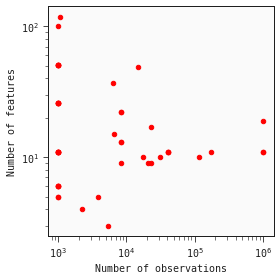

In [9]:
# Latex formatting for the only figure that we include in the article

#import matplotlib as mpl
#
#mpl.rc('xtick',labelsize=10)
#mpl.rc('ytick',labelsize=10)
#
#mpl.rc('axes',labelsize=15)
#
#mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#mpl.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(4,4))

chosen_datasets.plot.scatter(
    x="n",
    y="fcount",
    loglog=True,
    ylabel="Number of features",
    xlabel="Number of observations",
    color="red",
    ax=ax
)
plt.tight_layout()
#plt.savefig("/home/jaan/devel/regressionArticle/article/figures/dataset_summary.pdf")

# Unility functions

In [10]:
def get_pmlb_data(name, randomseed, trainsize=250):
    df = pmlb.fetch_data(name, local_cache_dir="pmlb_data")
    return train_test_split(df,train_size=trainsize, random_state=randomseed)

from sklearn import svm, tree, linear_model, ensemble

def X(df):
    return df.iloc[:,:-1]

def y(df):
    return df.iloc[:,-1]

def fit_and_r2_score(model, train, test):
    model.fit(X(train), y(train))
    return model.score(X(train), y(train)), model.score(X(test), y(test))

# Compare to the usual suspects

In [11]:
#results = pd.DataFrame(columns=["dataset", "model", "randomseed", "train_r2", "test_r2"])
results = pd.read_csv("results-cache-wip.csv")

In [12]:
results

,dataset,model,randomseed,train_r2,test_r2
0,1028_SWD,LinearRegression(),0,0.383849,0.364391
1,1028_SWD,"Lasso(alpha=0.01, max_iter=100000)",0,0.381151,0.376314
2,1028_SWD,"Lasso(alpha=0.05, max_iter=100000)",0,0.357019,0.347825
3,1028_SWD,"Lasso(alpha=0.1, max_iter=100000)",0,0.302277,0.281026
4,1028_SWD,DecisionTreeRegressor(max_depth=1),0,0.245635,0.207330
...,...,...,...,...,...
4315,622_fri_c2_1000_50,QG-11-aic,4,0.921232,0.877472
4316,623_fri_c4_1000_10,QG-11-aic,4,0.908290,0.892929
4317,628_fri_c3_1000_5,QG-11-aic,4,0.906816,0.905469
4318,banana,QG-11-aic,4,0.709771,0.594856


In [13]:
results.dataset.value_counts()

537_houses                          90
592_fri_c4_1000_25                  90
197_cpu_act                         90
227_cpu_small                       90
588_fri_c4_1000_100                 90
1193_BNG_lowbwt                     90
4544_GeographicalOriginalofMusic    90
599_fri_c2_1000_5                   90
294_satellite_image                 90
1191_BNG_pbc                        90
589_fri_c2_1000_25                  90
586_fri_c3_1000_25                  90
607_fri_c4_1000_50                  90
618_fri_c3_1000_50                  90
609_fri_c0_1000_5                   90
titanic                             90
595_fri_c0_1000_10                  90
529_pollen                          90
1595_poker                          90
1028_SWD                            90
593_fri_c1_1000_10                  90
banana                              90
628_fri_c3_1000_5                   90
564_fried                           90
583_fri_c1_1000_50                  90
218_house_8L             

In [14]:
results.randomseed.value_counts()

0    864
4    864
1    864
2    864
3    864
Name: randomseed, dtype: int64

In [15]:
results.model.unique()

array(['LinearRegression()', 'Lasso(alpha=0.01, max_iter=100000)',
       'Lasso(alpha=0.05, max_iter=100000)',
       'Lasso(alpha=0.1, max_iter=100000)',
       'DecisionTreeRegressor(max_depth=1)',
       'DecisionTreeRegressor(max_depth=2)',
       'DecisionTreeRegressor(max_depth=4)',
       'DecisionTreeRegressor(max_depth=6)',
       'RandomForestRegressor(n_estimators=400)',
       'RandomForestRegressor(n_estimators=200)',
       'RandomForestRegressor()',
       'RandomForestRegressor(n_estimators=50)',
       'GradientBoostingRegressor(n_estimators=400)',
       'GradientBoostingRegressor(n_estimators=200)',
       'GradientBoostingRegressor()',
       'GradientBoostingRegressor(n_estimators=50)', 'QG-11-bic',
       'QG-11-aic'], dtype=object)

In [16]:
#results = results[~(results["model"].str.startswith("GradientBoostingRegressor(n_estimators=300)"))].reindex()

In [17]:
models = [
    linear_model.LinearRegression(),
    linear_model.Lasso(alpha=0.01, max_iter=100000),
    linear_model.Lasso(alpha=0.05, max_iter=100000),
    linear_model.Lasso(alpha=0.10, max_iter=100000),

    tree.DecisionTreeRegressor(max_depth=1),
    tree.DecisionTreeRegressor(max_depth=2),
    tree.DecisionTreeRegressor(max_depth=4),
    tree.DecisionTreeRegressor(max_depth=6),
    
    ensemble.RandomForestRegressor(n_estimators=400),
    ensemble.RandomForestRegressor(n_estimators=200),
    ensemble.RandomForestRegressor(n_estimators=100),
    ensemble.RandomForestRegressor(n_estimators=50),

    ensemble.GradientBoostingRegressor(n_estimators=400),
    ensemble.GradientBoostingRegressor(n_estimators=200),
    ensemble.GradientBoostingRegressor(n_estimators=100),
    ensemble.GradientBoostingRegressor(n_estimators=50),
]

In [18]:
def fit_comparison(name, randomseed):    
    global results

    print("Seed %i, Dataset: %s"%(randomseed,name), end="")
    train, test = get_pmlb_data(name, randomseed)
    print(" ... fetched", end="")
    for m in models:
        if ((results["dataset"]==name) & (results["model"]==str(m)) & (results["randomseed"]==randomseed)).any():
            # Skip if already run
            continue
        r2_train, r2_test = fit_and_r2_score(m, train, test)
        results = results.append({"dataset": name, "model": str(m), "randomseed": randomseed, "train_r2": r2_train, "test_r2": r2_test}, ignore_index=True)

    print(" ... and fitted")


In [19]:
for name in chosen_datasets["name"]:
    for randomseed in range(0,5):
        fit_comparison(name, randomseed)

Seed 0, Dataset: 1028_SWD ... fetched ... and fitted
Seed 1, Dataset: 1028_SWD ... fetched ... and fitted
Seed 2, Dataset: 1028_SWD ... fetched ... and fitted
Seed 3, Dataset: 1028_SWD ... fetched ... and fitted
Seed 4, Dataset: 1028_SWD ... fetched ... and fitted
Seed 0, Dataset: 1029_LEV ... fetched ... and fitted
Seed 1, Dataset: 1029_LEV ... fetched ... and fitted
Seed 2, Dataset: 1029_LEV ... fetched ... and fitted
Seed 3, Dataset: 1029_LEV ... fetched ... and fitted
Seed 4, Dataset: 1029_LEV ... fetched ... and fitted
Seed 0, Dataset: 1030_ERA ... fetched ... and fitted
Seed 1, Dataset: 1030_ERA ... fetched ... and fitted
Seed 2, Dataset: 1030_ERA ... fetched ... and fitted
Seed 3, Dataset: 1030_ERA ... fetched ... and fitted
Seed 4, Dataset: 1030_ERA ... fetched ... and fitted
Seed 0, Dataset: 1191_BNG_pbc ... fetched ... and fitted
Seed 1, Dataset: 1191_BNG_pbc ... fetched ... and fitted
Seed 2, Dataset: 1191_BNG_pbc ... fetched ... and fitted
Seed 3, Dataset: 1191_BNG_pbc ... 

# Fit a qgraph for each data set

In [20]:
ql = feyn.QLattice()


[production]
qlattice=a1b2c3
api_token=token

[stage]
server=https://qlattice.stage.abzu.ai
qlattice=a1b2c3
api_token=token

See documentation for more information: https://docs.abzu.ai/docs/guides/setup/accessing.html


In [21]:
def fit_qgraph(edges, criterion, randomseed):
    global results

    key = f"QG-{edges}-{criterion}"

    for name in chosen_datasets["name"]:    
        if ((results["dataset"]==name) & (results["model"]==key) & (results["randomseed"]==randomseed)).any():
            # Skip if already run
            continue

        train, test = get_pmlb_data(name, randomseed)
        ql.reset(randomseed)
        
        qg = ql.get_regressor(train.columns, train.columns[-1]).filter(feyn.filters.MaxEdges(edges))
    
        for _ in range(100):
            qg.fit(train, threads=10, criterion=criterion)
            print(key, randomseed, name)
            print("Train:\t", qg[0].r2_score(train), "\nTest:\t", qg[0].r2_score(test))

            ql.update(qg.best())

        for _ in range(1000):
            qg[0].fit(train)

        results = results.append({"dataset": name, "model": key, "randomseed": randomseed, "train_r2": qg[0].r2_score(train), "test_r2": qg[0].r2_score(test)}, ignore_index=True)

        time.sleep(6) # Protect my poor cpu

# Fit all QGraphs

In [22]:
for randomseed in range(0,5):
    fit_qgraph(11, "bic", randomseed=randomseed)
    fit_qgraph(11, "aic", randomseed=randomseed)

In [23]:
def hist_among(models=None, datasets=None):
    if models is None:
        models = results["model"].unique()
    if datasets is None:
        datasets = results["dataset"].unique()

    for dataset in datasets:
        subset = results[(results["dataset"] == dataset) & (results["test_r2"]>-1)]
        seeds = subset["randomseed"].unique()
        for seed in seeds:
            subsubset = subset[subset["randomseed"]==seed].sort_values(by="test_r2")
            subsubset.plot.barh(x="model", y=["test_r2","train_r2"], title=dataset+" "+str(seed),figsize=(8,6))
                

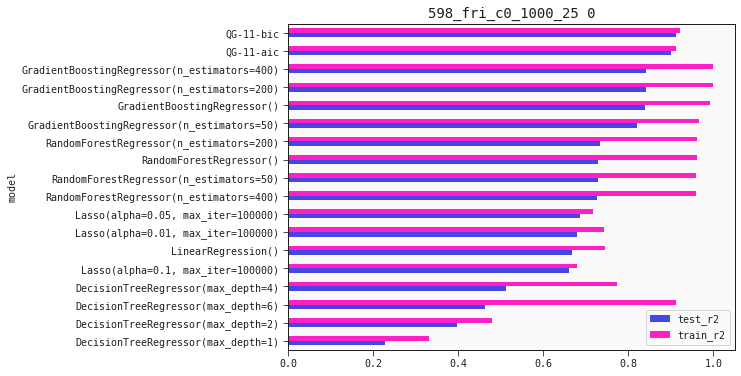

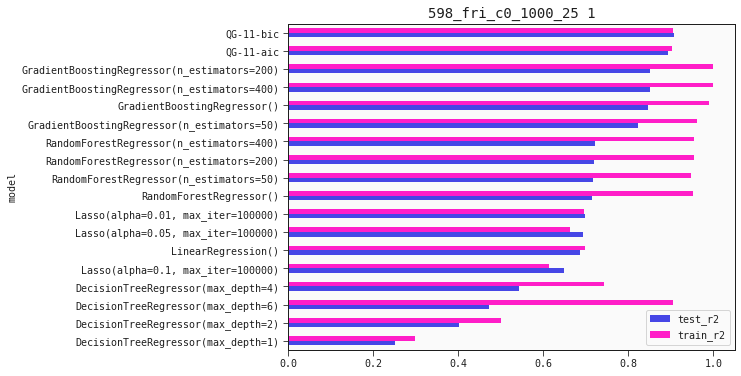

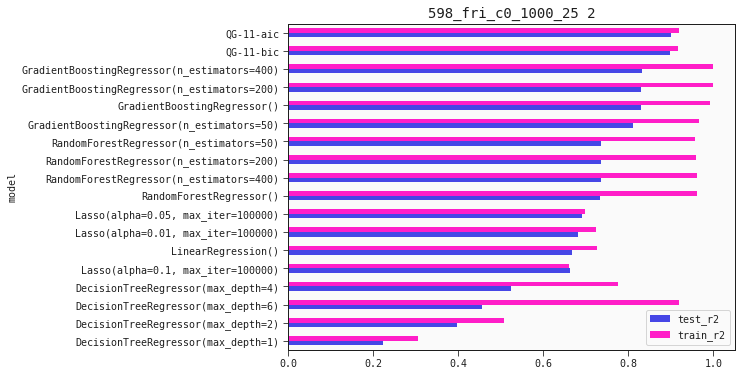

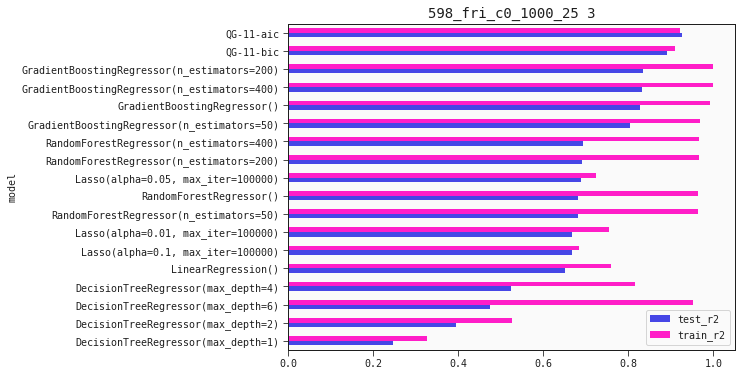

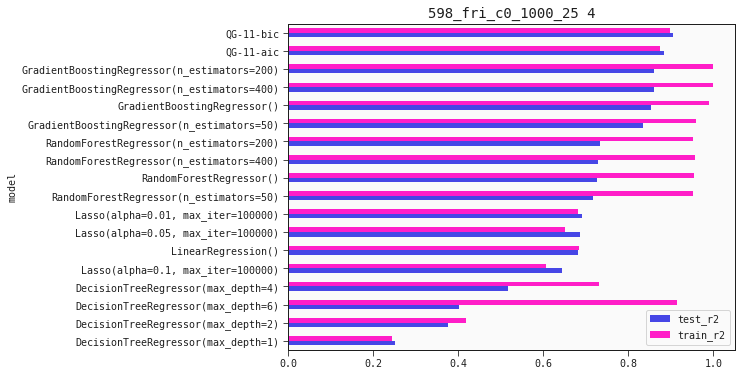

In [24]:
hist_among(None,["598_fri_c0_1000_25"])

In [25]:
#for name in chosen_datasets["name"]:
#    for seed in range(0,5):
#        subres = results[(results["dataset"] == name) & (results["randomseed"]==seed) & (results["test_r2"]>-1)].sort_values(by="test_r2")
#        if len(subres):
#            subres.plot.barh(x="model", y=["test_r2","train_r2"], title=name,figsize=(8,6))

In [26]:
results.to_csv(f"results-cache-wip.csv", index=False)

# Compare all models

In [27]:
def rank_among(models=None, rankpositions = None):
    if models is None:
        models = results["model"].unique()

    if rankpositions is None:
        rankpositions = len(models)-1

    # Only consider results for the chosen models
    res = results[results["model"].isin(models)].sort_values(by="test_r2", ascending=False)
    
    points = {m: 0 for m in models}
    
    for name in res["dataset"].unique(): # For each dataset
        for seed in res["randomseed"].unique(): # For each seed
            subset = res[(res["dataset"]==name) & (res["randomseed"]==seed)]
            if len(subset):
                for rank in range(rankpositions): # For each rank position
                    m = subset.iloc[rank].model
                    r2 = subset.iloc[rank].test_r2
                    points[m] += rankpositions - rank
    return pd.DataFrame(points.items(), columns=["model", "points"]).sort_values(by="points", ascending=True)

<AxesSubplot:>

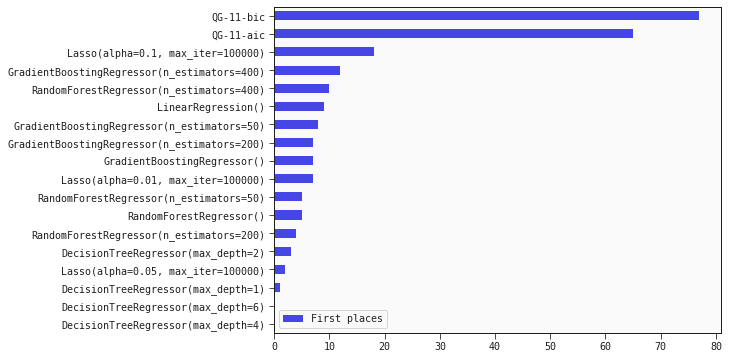

In [28]:
rank_among(rankpositions=1).plot.barh(x="model", y="points", label="First places", figsize=(8,6), xlabel="")

In [29]:
rank_among(rankpositions=1)

,model,points
6,DecisionTreeRegressor(max_depth=4),0
7,DecisionTreeRegressor(max_depth=6),0
4,DecisionTreeRegressor(max_depth=1),1
2,"Lasso(alpha=0.05, max_iter=100000)",2
5,DecisionTreeRegressor(max_depth=2),3
9,RandomForestRegressor(n_estimators=200),4
10,RandomForestRegressor(),5
11,RandomForestRegressor(n_estimators=50),5
1,"Lasso(alpha=0.01, max_iter=100000)",7
14,GradientBoostingRegressor(),7


<AxesSubplot:>

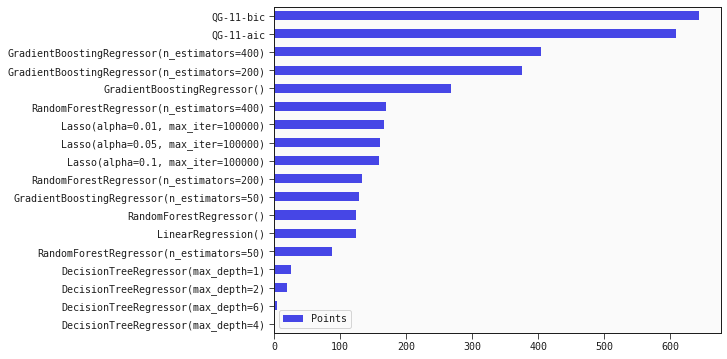

In [30]:
rank_among(rankpositions=5).plot.barh(x="model", y="points", label="Points", figsize=(8,6), xlabel="")

In [31]:
rank_among(rankpositions=5)

,model,points
6,DecisionTreeRegressor(max_depth=4),1
7,DecisionTreeRegressor(max_depth=6),4
5,DecisionTreeRegressor(max_depth=2),20
4,DecisionTreeRegressor(max_depth=1),25
11,RandomForestRegressor(n_estimators=50),88
0,LinearRegression(),124
10,RandomForestRegressor(),124
15,GradientBoostingRegressor(n_estimators=50),128
9,RandomForestRegressor(n_estimators=200),133
3,"Lasso(alpha=0.1, max_iter=100000)",158


<AxesSubplot:>

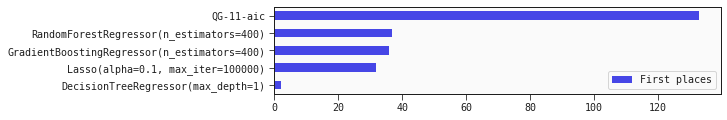

In [32]:
rank_among(
    models=["QG-11-aic", 
            "GradientBoostingRegressor(n_estimators=400)", 
            "Lasso(alpha=0.1, max_iter=100000)",
            "RandomForestRegressor(n_estimators=400)",
            "DecisionTreeRegressor(max_depth=1)"
           ],
    rankpositions=1
).plot.barh(x="model", y="points", label="First places", figsize=(8,1.6), xlabel="")

In [33]:
rank_among(
    models=["QG-11-aic", 
            "GradientBoostingRegressor(n_estimators=400)", 
            "Lasso(alpha=0.1, max_iter=100000)",
            "RandomForestRegressor(n_estimators=400)",
            "DecisionTreeRegressor(max_depth=1)"
           ],
    rankpositions=1
)

,model,points
4,DecisionTreeRegressor(max_depth=1),2
2,"Lasso(alpha=0.1, max_iter=100000)",32
1,GradientBoostingRegressor(n_estimators=400),36
3,RandomForestRegressor(n_estimators=400),37
0,QG-11-aic,133


In [34]:
rank_among(
    models=["QG-11-aic", 
            "Lasso(alpha=0.1, max_iter=100000)",
            "DecisionTreeRegressor(max_depth=1)"
           ],
    rankpositions=1
)

,model,points
2,DecisionTreeRegressor(max_depth=1),4
1,"Lasso(alpha=0.1, max_iter=100000)",42
0,QG-11-aic,194


In [35]:
results["randomseed"].value_counts()

0    864
4    864
1    864
2    864
3    864
Name: randomseed, dtype: int64

### Rankings to LaTeX table

In [36]:
first_scoring = rank_among(rankpositions=1)
second_scoring = rank_among(rankpositions=5)
best_scoring = rank_among(
    models=["QG-11-aic", 
            "GradientBoostingRegressor(n_estimators=400)", 
            "Lasso(alpha=0.1, max_iter=100000)",
            "RandomForestRegressor(n_estimators=400)",
            "DecisionTreeRegressor(max_depth=1)"
           ],
    rankpositions=1
)

In [37]:
first_scoring["First scoring"] = first_scoring.points
second_scoring["Second scoring"] = second_scoring.points
best_scoring["First scoring for best models"] = best_scoring.points


first_scoring.index = first_scoring.model
second_scoring.index = first_scoring.model
best_scoring.index = best_scoring.model

first_scoring = first_scoring.drop(["model", "points"], axis=1)
second_scoring = second_scoring.drop(["model", "points"], axis=1)
best_scoring = best_scoring.drop(["model", "points"], axis=1)

In [38]:
import numpy as np

In [39]:
latex_results = first_scoring.join(second_scoring).join(best_scoring).sort_values(by="First scoring", ascending=False)
latex_results["First scoring for best models"] = latex_results["First scoring for best models"].replace(np.nan, 0).astype(int)
latex_results["First scoring for best models"] = latex_results["First scoring for best models"].replace(0, "")
print(latex_results.to_latex())

\begin{tabular}{lrrl}
\toprule
{} &  First scoring &  Second scoring & First scoring for best models \\
model                                       &                &                 &                               \\
\midrule
QG-11-bic                                   &             77 &             644 &                               \\
QG-11-aic                                   &             65 &             608 &                           133 \\
Lasso(alpha=0.1, max\_iter=100000)           &             18 &             404 &                            32 \\
GradientBoostingRegressor(n\_estimators=400) &             12 &             375 &                            36 \\
RandomForestRegressor(n\_estimators=400)     &             10 &             268 &                            37 \\
LinearRegression()                          &              9 &             170 &                               \\
GradientBoostingRegressor(n\_estimators=50)  &              8 &             166 &     

## Search for a results figure

In [62]:
results

,dataset,model,randomseed,train_r2,test_r2
0,1028_SWD,LinearRegression(),0,0.383849,0.364391
1,1028_SWD,"Lasso(alpha=0.01, max_iter=100000)",0,0.381151,0.376314
2,1028_SWD,"Lasso(alpha=0.05, max_iter=100000)",0,0.357019,0.347825
3,1028_SWD,"Lasso(alpha=0.1, max_iter=100000)",0,0.302277,0.281026
4,1028_SWD,DecisionTreeRegressor(max_depth=1),0,0.245635,0.207330
...,...,...,...,...,...
4315,622_fri_c2_1000_50,QG-11-aic,4,0.921232,0.877472
4316,623_fri_c4_1000_10,QG-11-aic,4,0.908290,0.892929
4317,628_fri_c3_1000_5,QG-11-aic,4,0.906816,0.905469
4318,banana,QG-11-aic,4,0.709771,0.594856


In [63]:
# Collapse models
def replace_model(name: str) -> str:
    if "DecisionTree" in name:
        return "DecisionTree"
    if "GradientBoosting" in name:
        return "GradientBoosting"
    if "Lasso" in name or "LinearRegression" in name:
        return "LinearRegression"
    if "QG" in name:
        return "SymbolicRegression"
    if "RandomForest" in name:
        return "RandomForest"
    raise Exception

In [69]:
r2_agg = results.copy()
r2_agg.loc[:, "model"] = r2_agg.model.apply(replace_model)

r2_model_agg = results.copy()

In [70]:
r2_agg = r2_agg.groupby(by=['dataset', "model"]).agg({
    "train_r2": "mean",
    "test_r2": "mean",
}).reset_index(level=('dataset', "model"))

r2_model_agg = r2_model_agg.groupby(by=["model"]).agg({
    "train_r2": "mean",
    "test_r2": "mean",
}).reset_index(level=("model"))

### Scatter for best models

Plot a point for each of the best models by their average r^2 on train, test.

In [71]:
best_models = [
    'QG-11-bic',
    'Lasso(alpha=0.1, max_iter=100000)',
    'GradientBoostingRegressor(n_estimators=400)',
    'RandomForestRegressor(n_estimators=400)',
    'DecisionTreeRegressor(max_depth=2)'
]
r2_best = r2_model_agg[r2_model_agg.model.apply(lambda x: x in best_models)]
r2_best

,model,train_r2,test_r2
1,DecisionTreeRegressor(max_depth=2),0.525846,0.411267
6,GradientBoostingRegressor(n_estimators=400),0.958030,0.663370
10,"Lasso(alpha=0.1, max_iter=100000)",0.448748,0.352860
13,QG-11-bic,0.763915,0.689871
16,RandomForestRegressor(n_estimators=400),0.923909,0.664689


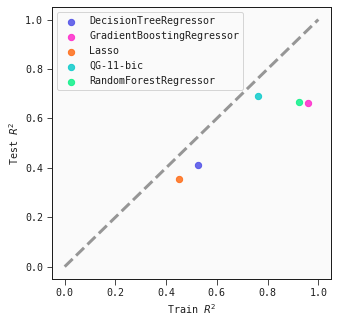

In [72]:
pkwargs = {
    "alpha": .8,
    "s": 40
}

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel(r"Train $R^2$")
ax.set_ylabel(r"Test $R^2$")

ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), ls="--", color="black", alpha=0.4)
for _, (model_name, train_r2, test_r2) in r2_best.iterrows():
    #print(model_name, train_r2, test_r2)
    ax.scatter(train_r2, test_r2, label=model_name.split('(')[0], **pkwargs)
    
plt.legend()
plt.show()

### Per (dataset, model) R^2 scatterplot

Every models performance on every dataset is plotted, colored by what class of model it is.

In [73]:
sr_results = r2_agg[list(map(lambda x: "Symbolic" in x, r2_agg.model))]
dt_results = r2_agg[list(map(lambda x: "DecisionTree" in x, r2_agg.model))]
gb_results = r2_agg[list(map(lambda x: "GradientBoosting" in x, r2_agg.model))]
rf_results = r2_agg[list(map(lambda x: "RandomForest" in x, r2_agg.model))]
lr_results = r2_agg[list(map(lambda x: "LinearRegression" in x or "Lasso" in x, r2_agg.model))]

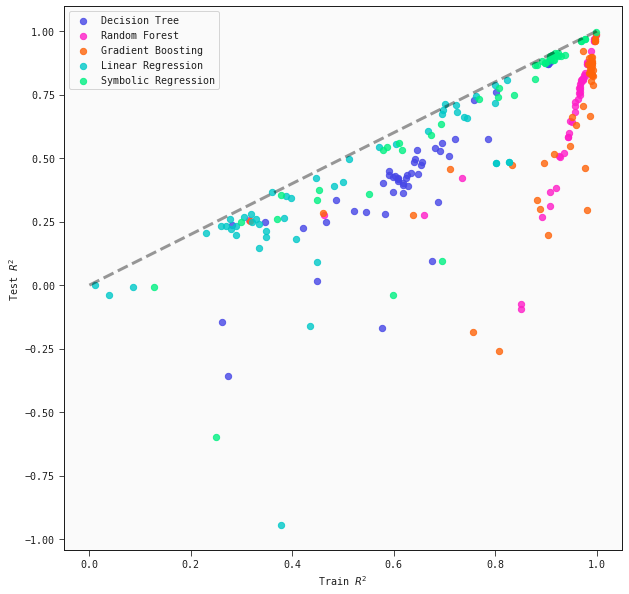

In [75]:
pkwargs = {
    "alpha": .8,
    "s": 40
}

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlabel(r"Train $R^2$")
ax.set_ylabel(r"Test $R^2$")

ax.scatter(dt_results.train_r2, dt_results.test_r2, label="Decision Tree", **pkwargs)
ax.scatter(rf_results.train_r2, rf_results.test_r2, label="Random Forest", **pkwargs)
ax.scatter(gb_results.train_r2, gb_results.test_r2, label="Gradient Boosting", **pkwargs)
ax.scatter(lr_results.train_r2, lr_results.test_r2, label="Linear Regression", **pkwargs)
ax.scatter(sr_results.train_r2, sr_results.test_r2, label="Symbolic Regression", **pkwargs)
ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), ls="--", color="black", alpha=0.4)

plt.legend()
plt.show()

### Histogram of test R^2 per model class

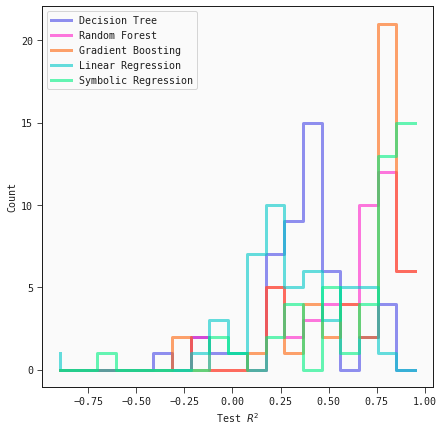

In [84]:
# Common bins
min_r2, max_r2 = r2_agg.test_r2.min(), r2_agg.test_r2.max()
bins = np.linspace(min_r2, max_r2, 21)
X = 0.5 * (bins[1:] + bins[:-1])

def Y(r2s):
    y, _ = np.histogram(r2s, bins)
    return y


hkwargs = {
    'alpha': .6,
    'lw': 3,
}

fig, ax = plt.subplots(figsize=(7, 7))

ax.set_xlabel(r"Test $R^2$")
ax.set_ylabel(r"Count")

ax.step(X, Y(dt_results.test_r2), label="Decision Tree", **hkwargs)
ax.step(X, Y(rf_results.test_r2), label="Random Forest", **hkwargs)
ax.step(X, Y(gb_results.test_r2), label="Gradient Boosting", **hkwargs)
ax.step(X, Y(lr_results.test_r2), label="Linear Regression", **hkwargs)
ax.step(X, Y(sr_results.test_r2), label="Symbolic Regression", **hkwargs)

plt.legend()
plt.show()

### Out of interest, what is the expectation value of the Test R2

In [94]:
def ex(X, Y):
    Y_norm = Y / Y.sum()
    return sum(X * Y_norm)

print('Decision Tree '       +"\t\t{:.4f}".format(ex(X, Y(dt_results.test_r2))))
print('Random Forest '       +"\t\t{:.4f}".format(ex(X, Y(rf_results.test_r2))))
print('Gradient Boosting '   +"\t{:.4f}".format(ex(X, Y(gb_results.test_r2))))
print('Linear Regression '   +"\t{:.4f}".format(ex(X, Y(lr_results.test_r2))))
print('Symbolic Regression ' +"\t{:.4f}".format(ex(X, Y(sr_results.test_r2))))

Decision Tree 		0.4151
Random Forest 		0.6581
Gradient Boosting 	0.6702
Linear Regression 	0.3564
Symbolic Regression 	0.6925


Yay we slightly win